Let's do some spatial analysis by using PySAL - Spatial Analysis package. Today we are going to do an exploratory analysis using choropleth maps!

In [130]:
#Let's first import the necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

We need data first. And I would like to download some crime data to do some exploratory analysis. 
This seems like a useful data to begin with:
    https://catalog.data.gov/dataset/tiger-line-shapefile-2017-state-massachusetts-current-place-state-based
    https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-6/table-6-state-cuts/massachusetts.xls

# Data cleaning

In [131]:
crime_table =pd.read_csv("massachusetts.csv")
crime_table.head()

,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
0,Abington,"16,201",36,0.0,5.0,2,29,238,63,164,11,0.0
1,Acton,"23,770",24,1.0,3.0,0,20,169,23,141,5,0.0
2,Acushnet,"10,466",19,0.0,1.0,1,17,134,61,67,6,0.0
3,Adams,"8,131",24,0.0,4.0,1,19,116,29,84,3,1.0
4,Agawam,"28,844",81,0.0,10.0,7,64,489,173,284,32,2.0


In [132]:
cities = gpd.read_file("Towns_MA.shp")
cities.head()

,OBJECTID,TOWNS_ID,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,...,POPCH90_00,FOURCOLOR,TYPE,ISLAND,FIPS_MCD,FIPS_COUNT,SHAPE_AREA,SHAPE_LEN,munic,geometry
0,1,1,259,SALISBURY,25009,145,59245,6745,6882,7827,...,945,4,T,0,25009145,9,4.137279e+07,33680.649196,Salisbury,"POLYGON ((255896.314 958162.371, 255890.434 95..."
1,2,2,7,AMESBURY,25009,005,01185,14563,14997,16450,...,1453,1,TC,0,25009005,9,3.556304e+07,26562.355475,Amesbury,"POLYGON ((247828.474 959732.501, 248181.984 95..."
2,3,3,180,MERRIMAC,25009,090,40430,4733,5166,6138,...,972,3,T,0,25009090,9,2.301019e+07,20072.933038,Merrimac,"POLYGON ((240469.954 957090.121, 240904.874 95..."
3,4,4,206,NEWBURYPORT,25009,790,45245,16545,16317,17189,...,872,2,C,0,25009790,9,2.202240e+07,24596.491343,Newburyport,"POLYGON ((248708.734 953867.561, 248823.224 95..."
4,5,5,128,HAVERHILL,25009,710,29405,47715,51418,58969,...,7551,2,C,0,25009710,9,9.231557e+07,43136.254311,Haverhill,"POLYGON ((236472.094 953725.191, 239172.474 95..."


<AxesSubplot:>

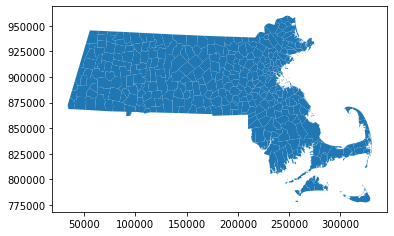

In [133]:
cities.plot()

In [134]:
df = cities.merge(crime_table, left_on='munic', right_on='City' , how='left')
gdf =gpd.GeoDataFrame(df)
gdf.head()

,OBJECTID,TOWNS_ID,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,...,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
0,1,1,259,SALISBURY,25009,145,59245,6745,6882,7827,...,34,0.0,8.0,4,22,154,36,111,7,0.0
1,2,2,7,AMESBURY,25009,005,01185,14563,14997,16450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,180,MERRIMAC,25009,090,40430,4733,5166,6138,...,7,0.0,1.0,1,5,37,11,26,0,1.0
3,4,4,206,NEWBURYPORT,25009,790,45245,16545,16317,17189,...,17,0.0,5.0,1,11,192,23,165,4,0.0
4,5,5,128,HAVERHILL,25009,710,29405,47715,51418,58969,...,373,1.0,20.0,37,315,982,247,653,82,7.0


In [135]:
print('Observations, Attributes:',gdf.shape)

Observations, Attributes: (611, 33)


# Plotting the Crime Case : Theft 

Classification by natural breaks

<AxesSubplot:>

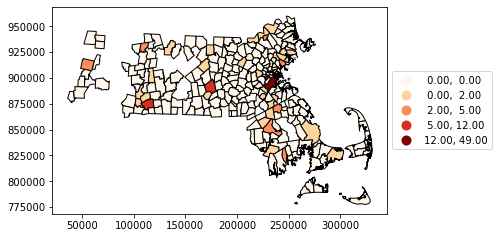

In [136]:
gdf.plot(column='Murder', scheme='natural_breaks', k=5, cmap='OrRd', edgecolor='k', legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

Example is adapted from : https://geopandas.org/en/stable/gallery/choropleths.html